# Project 1: End-to_End Pipeline to Classify News Articles

# Getting Familiar with the Dataset

### Question 1

Overview: How many rows(samples) and columns(features) are present in the dataset?

Histograms: Plot 3 histograms on (a) The total number of alpha-numeric characters per data point(row) in the feature full_text (i.e. count on the x-axis and frequency on the y-axis), (b) The columnn leaf_label - class on the x-axis, (c) The column root_label - class on the x-axis.

Interpret Plots: Provide qualitative interpretations of the histograms. 

In [820]:
import pandas as pd
import numpy as np

# Import dataset
df = pd.read_csv('Project1-ClassificationDataset.csv')

# Print dataset
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports


In [821]:
# Report number of rows/samples and columns/features
print('Number of rows/samples: ', len(df))
print('Number of columns/features: ', len(df.columns))

Number of rows/samples:  3476
Number of columns/features:  8


Text(0.5, 0, 'Count')

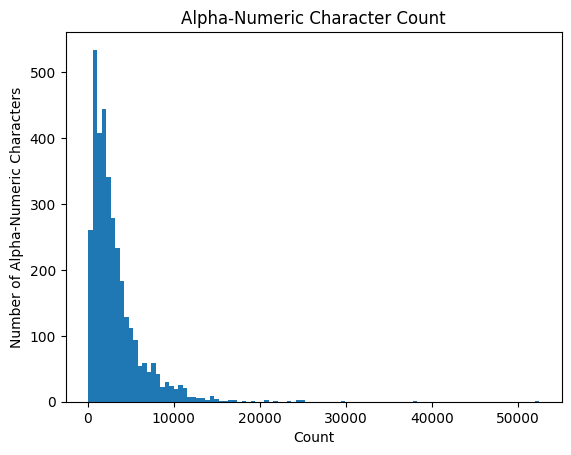

In [822]:
import matplotlib.pyplot as plt

# Extract length of full_text string value for each row
df['Alpha-Numeric Character Count'] = df.full_text.str.len()

# Plot Histogram
ax = df.hist(column = 'Alpha-Numeric Character Count', bins = 100, grid = False)
plt.ylabel('Number of Alpha-Numeric Characters')
plt.xlabel('Count')

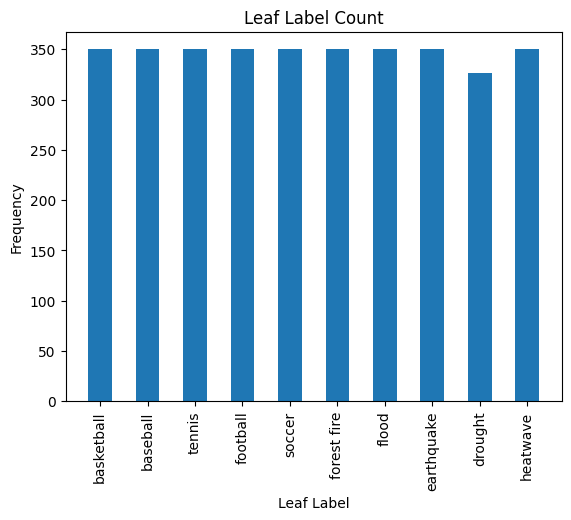

In [823]:
from collections import Counter

# Extract each leaf label and it's frequency
counter = Counter(df['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot Histogram
index = np.arange(len(leaf_names))
plt.bar(index, leaf_counts, 0.5)
plt.xticks(index, leaf_names, rotation = 90)
plt.title('Leaf Label Count')
plt.ylabel('Frequency')
plt.xlabel('Leaf Label')
plt.show()

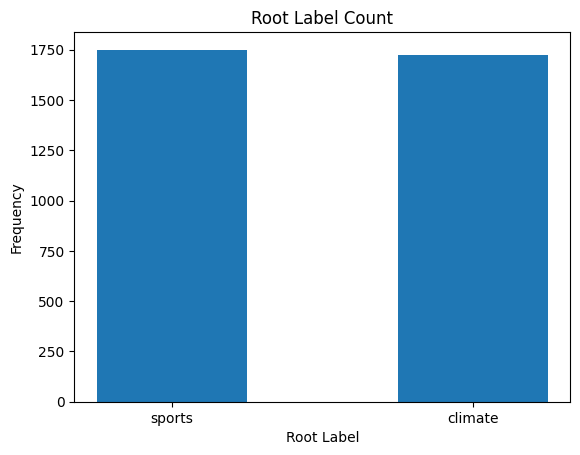

In [824]:
from collections import Counter

# Extract each root label and it's frequency
counter = Counter(df['root_label'])
root_names = counter.keys()
root_count = counter.values()

# Plot Histogram
index = np.arange(len(root_names))
plt.bar(index, root_count, 0.5)
plt.xticks(index, root_names)
plt.title('Root Label Count')
plt.ylabel('Frequency')
plt.xlabel('Root Label')
plt.show()

# Binary Classification

### Question 2

Report the number of training and testing samples.

In [825]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

In [826]:
from sklearn.model_selection import train_test_split

# Split the entire dataset into training and testing sets
train, test = train_test_split(df[['full_text', 'root_label']], test_size=0.2)

# Report the number of training and testing samples
num_training_samples = len(train)
num_testing_samples = len(test)

# Report the number of training and testing samples
print("Number of training samples:", num_training_samples)
print("Number of testing samples:", num_testing_samples)

Number of training samples: 2780
Number of testing samples: 696


In [827]:
# Verify dataset post train, test
train

,full_text,root_label
2677,'While the four-day Aftershock's economic impa...,climate
1204,'CBS Essentials is created independently of th...,sports
2955,'Moderate-to-severe drought will likely contin...,climate
2266,"'Colleen Flood, the longtime co-owner of The F...",climate
611,'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...,sports
...,...,...
1095,'(Photo by Justin Casterline/Getty Images)\n\n...,sports
1130,"'COOKEVILLE, Tenn. (WKRN) — The Golden Eagles ...",sports
1294,'FanDuel Sportsbook has launched an exclusive ...,sports
860,"'Hunting stories are a Maine tradition, just l...",sports


In [828]:
# Verify dataset post train, test
test

,full_text,root_label
2069,"'A small patch of snow on the ground in Douai,...",climate
1425,"'Antonio Zago, of Brazil, puts on a jersey dur...",sports
309,'NEW YORK >> The Las Vegas Aces became the fir...,sports
2270,'Christian Abraham/Hearst Connecticut Media\n\...,climate
3037,'The City of Watertown is currently under a wa...,climate
...,...,...
547,"'Jasper, TX (75951)\n\nToday\n\nPeriods of rai...",sports
776,'The ATP Finals – the final tennis championshi...,sports
2873,'BOSTON — The regulations directing how the st...,climate
2236,'After weeks of infighting and turmoil that ha...,climate


# Feature Extraction

### Question 3

Use the following specs to extract features from the textual data:
- Before doing anything, please clean each data sample using the code block provided. This function helps remove many but not all HTML  artefacts from the crawler's output. You can also build your own cleaning module if you find this function to be ineffective. 
- Use the "english" stopwords of the CountVectorizer
- Exclude terms that are numbers
- Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
- Use min_df = 3

Please answer the following questions:
- What are the pros and cons of lemmatization versus stemming? How do these processes affect the dictionary size?
- min_df means minimum document frequency. How does varying min_df change the TF-IDF matrix?
- Should I remove stopwords before or after lemmatizing? Should I remove punctuations before or after lemmatizing? Should I remove numbers before or after lemmatizing? Hint: Recall that the full sentence is input into the Lemmatizer and the lemmatizer is tagging the position of every word based on the sentence structure.
- Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of k x 10^3. This dimension will vary depending on your exact method of cleaning and lemmatizing and that is okay. 

In [829]:
import re

# Use function provided in assignment to clean data
def clean(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    texter = re.sub(r"[0-9]","", texter)
    texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter)
    texter = re.sub('\s+',' ', texter)
    texter = texter.lower()
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [830]:
# Apply function to clean data to training data 
train_clean = train['full_text'].apply(clean)

# Print Results
train_clean

2677     while the four day aftershock s economic impa...
1204     cbs essentials is created independently of th...
2955     moderate to severe drought will likely contin...
2266     colleen flood the longtime co owner of the fo...
611      washington traffic may have saved his life ye...
                              ...                        
1095     photo by justin casterline getty images oan s...
1130     cookeville tenn wkrn the golden eagles will h...
1294     fanduel sportsbook has launched an exclusive ...
860      hunting stories are a maine tradition just li...
3174     by lewis jackson sydney reuters thousands of ...
Name: full_text, Length: 2780, dtype: object

In [831]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
import re

# WordNetLemmatizer
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

# Functions from Project 1 Helper Code
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def rmv_nums(doc):
    # Text input is string, returns array of lowercased strings(words).
    return (word for word in lemmatize_sent(analyzer(doc)) 
            if not word.isdigit())

# CountVectorizer 
vectorizer = CountVectorizer(analyzer = rmv_nums, min_df = 3, stop_words='english')

# Fit and transform the training data
X_train_counts = vectorizer.fit_transform(train['full_text'])

# Transform testing data
X_test_counts = vectorizer.transform(test['full_text'])

# TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform training data using TfidfTransformer
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform testing data using fitted TfidfTransformer
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Print Results
print("Shape of TF-IDF-processed train matrix:", X_train_tfidf.shape)
print("Shape of TF-IDF-processed test matrix:", X_test_tfidf.shape)

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Shape of TF-IDF-processed train matrix: (2780, 13413)
Shape of TF-IDF-processed test matrix: (696, 13413)


# Dimensionality Reduction

### Question 4

Reduce the dimensionality of the data using the methods above:

- Plot the explained variance ratio across multiple different k = [1, 10, 50, 100, 200, 500, 1000, 2000] for LSI and for the next few sections choose k = 50. What does the explained variance ratio plot look like? What does the plot's concavity suggest?
- With k = 50 found in the previous sections, calculate the reconstruction residual MSE error when using LSI and NMF - they both should use the same k = 50. Which one is larger, the ||X−WH|| in NMF or the ||X−U Σ V^T|| in LSI and why?

Text(0.5, 0, 'k')

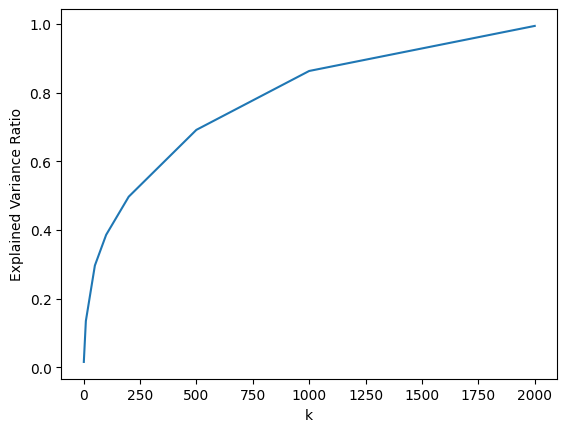

In [832]:
# Given k values
k_values = [1, 10, 50, 100, 200, 500, 1000, 2000]

exp_variance = []

# Calculate explained variance across multiple different k values
for k in k_values:
    svd = TruncatedSVD(n_components = k, random_state = 0)
    X_train_LSI = svd.fit_transform(X_train_tfidf)
    X_test_LSI = svd.transform(X_test_tfidf)
    explained_variance = svd.explained_variance_ratio_.sum()
    exp_variance.append(explained_variance)

# Plot Explained Variance Ratio Across K
plt.plot(k_values, exp_variance)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('k')

In [833]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

# Convert TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# LSI model with k=50
lsi_model = TruncatedSVD(n_components=50, random_state=42)

# Fit LSI model on the dense TF-IDF matrix
U = lsi_model.fit_transform(X_train_dense)
Sigma = np.diag(lsi_model.explained_variance_)
VT = lsi_model.components_
X_reconstructed_lsi = U.dot(Sigma).dot(VT)

# MSE error for LSI
mse_lsi = mean_squared_error(X_train_dense, X_reconstructed_lsi)

# NMF model with k=50
nmf_model = NMF(n_components=50, random_state=42)

# Fit NMF model on the dense TF-IDF matrix
W = nmf_model.fit_transform(X_train_dense)
H = nmf_model.components_
X_reconstructed_nmf = W.dot(H)

# MSE error for NMF
mse_nmf = mean_squared_error(X_train_dense, X_reconstructed_nmf)

# Print MSE errors
print("NMF Mean Square Error: ", mse_nmf)
print("LSI Mean Square Error: ", mse_lsi)

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF Mean Square Error:  4.595120274295979e-05
LSI Mean Square Error:  7.395935599302655e-05


# Classification Algorithms

### Question 5 

Compare and contrast hard-margin and soft-margin linear SVMs:

Train two linear SVMs:
  - Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin).
  - Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of both SVM classifiers on the testing set. Which one performs better? What about for γ = 100000?
  - What happens for the soft margin SVM? Why is this the case? Analyze in terms of the confusion matrix.
  - Does the ROC curve reflect the performance of the soft-margin SVM? Why?

Use cross-validation to choose γ (use average validation accuracy to compare): Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10k| − 3 ≤ k ≤ 6,k ∈ Z}. Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision, and F-1 score of this best SVM.

In [834]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to y train and test data
y_train_encoded = label_encoder.fit_transform(train["root_label"])
y_test_encoded = label_encoder.transform(test["root_label"])

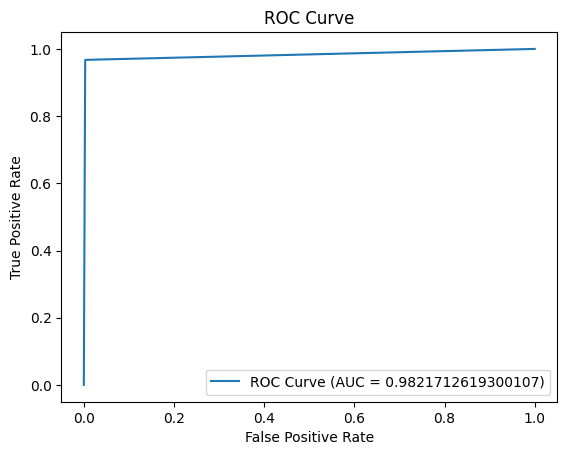

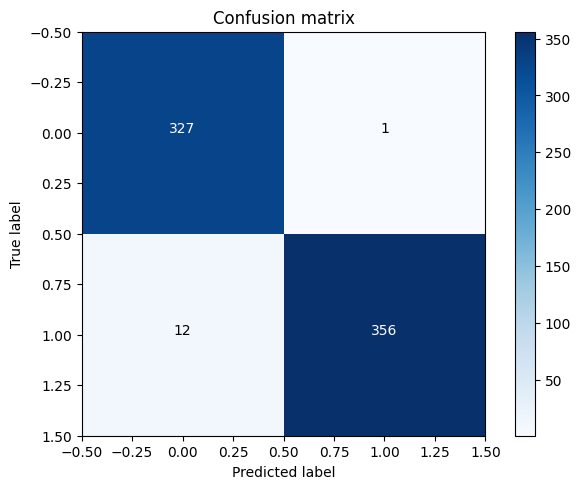

Confusion Matrix:
[[327   1]
 [ 12 356]]
Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Your C Value: 1000


In [835]:
# HARD MARGIN
C = 1000  

# SVM classifier
svm = SVC(kernel = 'linear', probability = True, C = C)
svm.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred = svm.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
precision = metrics.precision_score(y_test_encoded, y_pred)
recall = metrics.recall_score(y_test_encoded, y_pred)
f1_score = metrics.f1_score(y_test_encoded, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_pred)
auc = metrics.roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

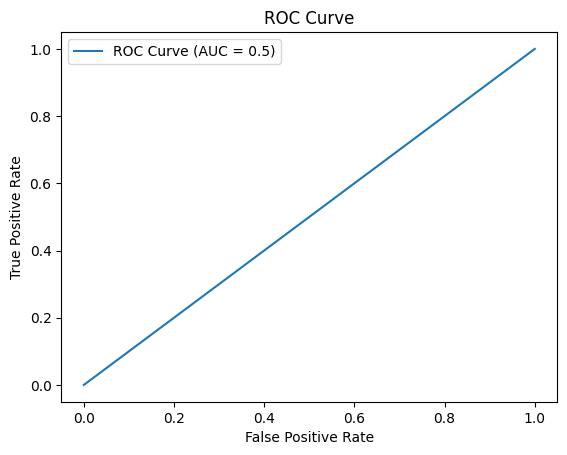

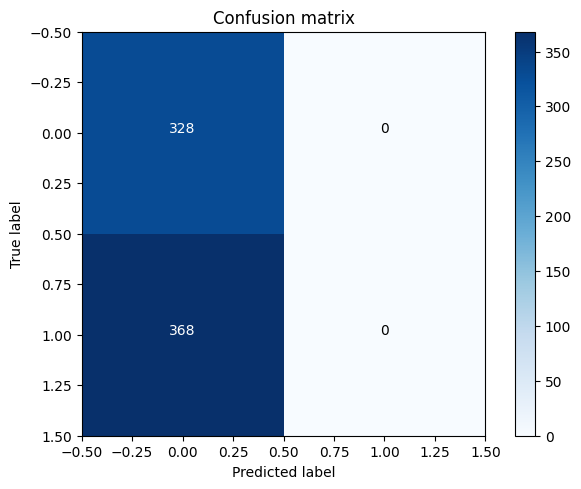

Confusion Matrix:
[[328   0]
 [368   0]]
Accuracy: 0.47126436781609193
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Your C Value: 0.0001


In [836]:
# SOFT MARGIN
C = 0.0001 

# SVM classifier
svm = SVC(kernel = 'linear', probability = True, C = C)
svm.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred = svm.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
precision = metrics.precision_score(y_test_encoded, y_pred, zero_division = 1)
recall = metrics.recall_score(y_test_encoded, y_pred)
f1_score = metrics.f1_score(y_test_encoded, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_pred)
auc = metrics.roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

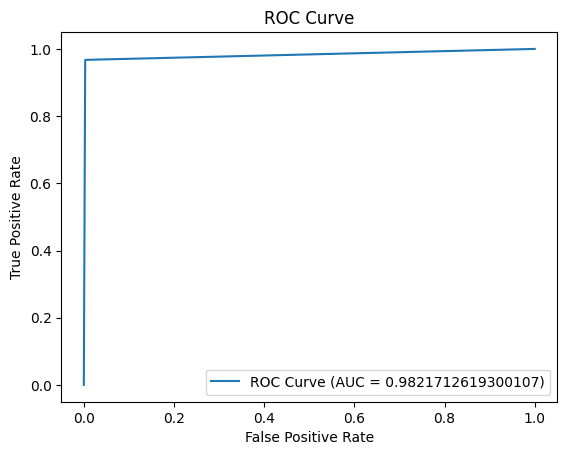

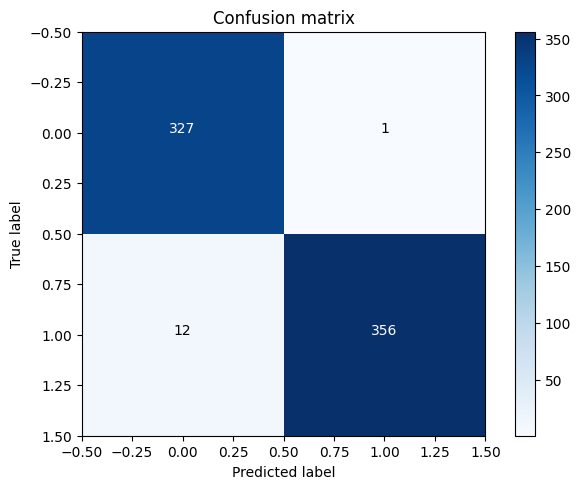

Confusion Matrix:
[[327   1]
 [ 12 356]]
Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Your C Value: 100000


In [785]:
# HIGHEST MARGIN
C = 100000  

# SVM classifier 
svm = SVC(kernel = 'linear', probability = True, C = C)
svm.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred = svm.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
precision = metrics.precision_score(y_test_encoded, y_pred)
recall = metrics.recall_score(y_test_encoded, y_pred)
f1_score = metrics.f1_score(y_test_encoded, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_pred)
auc = metrics.roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

Best C: 10


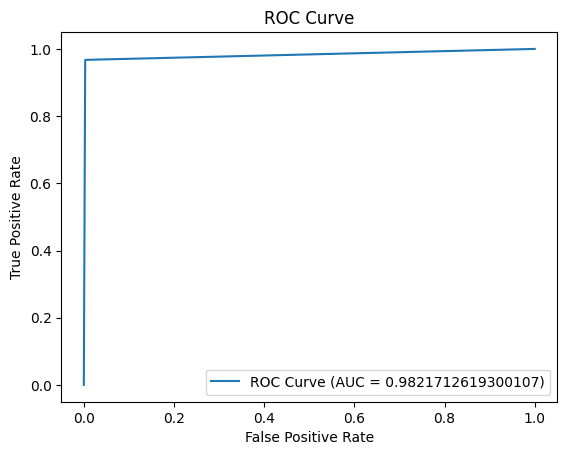

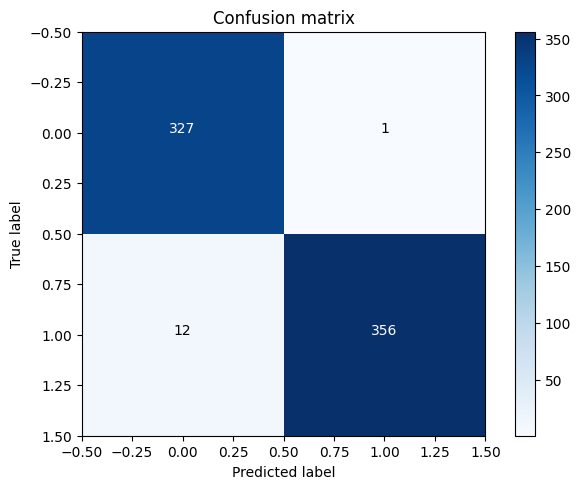

Confusion Matrix:
[[327   1]
 [ 12 356]]
Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Best C: 10


In [786]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Range of C values
param_grid = {'C': [10**k for k in range(-3, 7)]}

# SVM classifier
svm = SVC(kernel = 'linear', probability = True)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_tfidf, y_train_encoded)

# Best C value
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# SVM classifier with the best C value 
best_svm = SVC(kernel = 'linear', probability = True, C = best_C)
best_svm.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred = best_svm.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
precision = metrics.precision_score(y_test_encoded, y_pred)
recall = metrics.recall_score(y_test_encoded, y_pred)
f1_score = metrics.f1_score(y_test_encoded, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_pred)
auc = metrics.roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Best C:', best_C)


# Logistic Regression 

### Question 6

Evaluate a logistic classifier:

Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear_model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision, and F-1 score of this classifier on the testing set. 

Find the optimal regularization coefficient:

- Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal regularization strength in the range {10k|−5 ≤ k ≤ 5,k ∈ Z} for logistic regression with L1 regularization and logistic regression with L2 regularization, respectively.
- Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.
- How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?
- Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. What is the difference between their ways to find this boundary? Why do their performances differ? Is this difference statistically significant?

In [787]:
from sklearn.linear_model import LogisticRegressionCV

# Range of regularization strengths
regularization_strengths = [10**k for k in range(-5, 6)]

# Grid search for L1 
logistic_l1 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l1', solver = 'liblinear')
logistic_l1.fit(X_train_tfidf, y_train_encoded)

# Best regularization strength for L1 
best_c_l1 = logistic_l1.C_[0]

# Grid search for L2 
logistic_l2 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l2')
logistic_l2.fit(X_train_tfidf, y_train_encoded)

# Best regularization strength for L2 
best_c_l2 = logistic_l2.C_[0]

# Print Results
print("Best regularization strength for L1 regularization:", best_c_l1)
print("Best regularization strength for L2 regularization:", best_c_l2)

Best regularization strength for L1 regularization: 1000.0
Best regularization strength for L2 regularization: 100.0


Performance Metrics - Logistic Classifier without Regularization:
Accuracy: 0.9798850574712644
Precision: 0.9971910112359551
Recall: 0.9646739130434783
F1 Score: 0.9806629834254144
Confusion Matrix - No Regularization:
[[327   1]
 [ 13 355]]


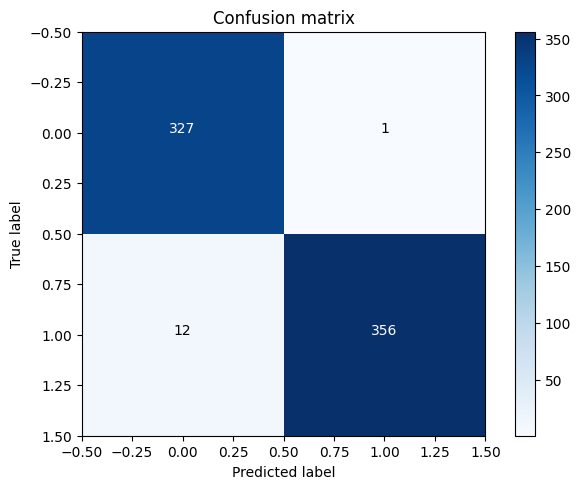

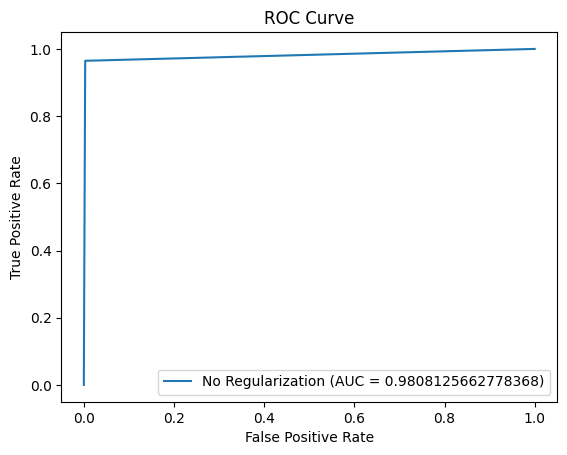

In [788]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier without regularization
logistic_no_reg = LogisticRegression(penalty = None, solver = 'saga', max_iter = 10000)
logistic_no_reg.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred_no_reg = logistic_no_reg.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_no_reg = metrics.accuracy_score(y_test_encoded, y_pred_no_reg)
precision_no_reg = metrics.precision_score(y_test_encoded, y_pred_no_reg, zero_division = 1)
recall_no_reg = metrics.recall_score(y_test_encoded, y_pred_no_reg)
f1_score_no_reg = metrics.f1_score(y_test_encoded, y_pred_no_reg)

# Print performance metrics 
print("Performance Metrics - Logistic Classifier without Regularization:")
print(f"Accuracy: {accuracy_no_reg}")
print(f"Precision: {precision_no_reg}")
print(f"Recall: {recall_no_reg}")
print(f"F1 Score: {f1_score_no_reg}")

# Calculate confusion matrix 
conf_matrix_no_reg = metrics.confusion_matrix(y_test_encoded, y_pred_no_reg)

# Print confusion matrix
print('Confusion Matrix - No Regularization:')
print(conf_matrix_no_reg)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Plot ROC curve 
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test_encoded, y_pred_no_reg)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg) 
plt.plot(fpr_no_reg, tpr_no_reg, label = f'No Regularization (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Performance Metrics - Logistic Classifier with L1 Regularization:
Accuracy: 0.9827586206896551
Precision: 0.9944444444444445
Recall: 0.9728260869565217
F1 Score: 0.9835164835164835
Confusion Matrix - L1 Regularization:
[[326   2]
 [ 10 358]]


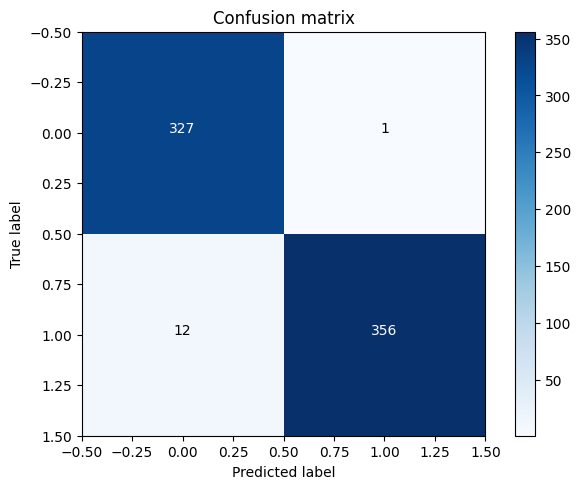

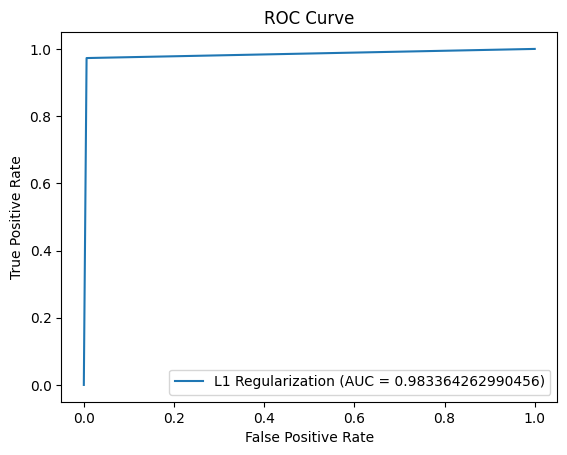

In [789]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier with L1 
logistic_l1 = LogisticRegression(penalty = 'l1', C=best_c_l1, solver = 'saga', max_iter = 10000)
logistic_l1.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred_l1 = logistic_l1.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_l1 = metrics.accuracy_score(y_test_encoded, y_pred_l1)
precision_l1 = metrics.precision_score(y_test_encoded, y_pred_l1, zero_division=1)
recall_l1 = metrics.recall_score(y_test_encoded, y_pred_l1)
f1_score_l1 = metrics.f1_score(y_test_encoded, y_pred_l1)

# Print performance metrics
print("Performance Metrics - Logistic Classifier with L1 Regularization:")
print(f"Accuracy: {accuracy_l1}")
print(f"Precision: {precision_l1}")
print(f"Recall: {recall_l1}")
print(f"F1 Score: {f1_score_l1}")

# Confusion matrix 
conf_matrix_l1 = metrics.confusion_matrix(y_test_encoded, y_pred_l1)

# Print confusion matrix
print('Confusion Matrix - L1 Regularization:')
print(conf_matrix_l1)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Plot ROC curve 
fpr_l1, tpr_l1, _ = roc_curve(y_test_encoded, y_pred_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)
plt.plot(fpr_l1, tpr_l1, label = f'L1 Regularization (AUC = {roc_auc_l1})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Performance Metrics - Logistic Classifier with L2 Regularization:
Accuracy: 0.9827586206896551
Precision: 0.9944444444444445
Recall: 0.9728260869565217
F1 Score: 0.9835164835164835
Confusion Matrix - L2 Regularization:
[[326   2]
 [ 10 358]]


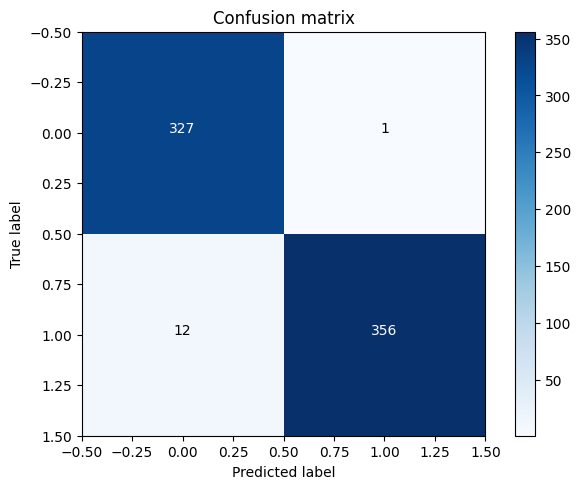

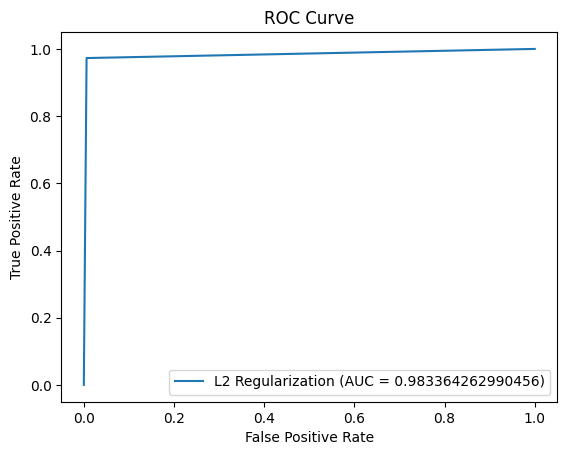

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier with L2 
logistic_l2 = LogisticRegression(penalty = 'l2', C = best_c_l2, solver = 'saga', max_iter = 10000)
logistic_l2.fit(X_train_tfidf, y_train_encoded)

# Predict labels 
y_pred_l2 = logistic_l2.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_l2 = metrics.accuracy_score(y_test_encoded, y_pred_l2)
precision_l2 = metrics.precision_score(y_test_encoded, y_pred_l2, zero_division = 1)
recall_l2 = metrics.recall_score(y_test_encoded, y_pred_l2)
f1_score_l2 = metrics.f1_score(y_test_encoded, y_pred_l2)

# Print performance metrics
print("Performance Metrics - Logistic Classifier with L2 Regularization:")
print(f"Accuracy: {accuracy_l2}")
print(f"Precision: {precision_l2}")
print(f"Recall: {recall_l2}")
print(f"F1 Score: {f1_score_l2}")

# Confusion matrix for logistic_l2
conf_matrix_l2 = metrics.confusion_matrix(y_test_encoded, y_pred_l2)

# Print Confusion matrix
print('Confusion Matrix - L2 Regularization:')
print(conf_matrix_l2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Plot ROC curve for logistic_l2
fpr_l2, tpr_l2, _ = roc_curve(y_test_encoded, y_pred_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)
plt.plot(fpr_l2, tpr_l2, label = f'L2 Regularization (AUC = {roc_auc_l2})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Naive Bayes Model

### Question 7

Evaluate and profile a Naive Bayes classifier: Train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of this classifier on the testing set. 

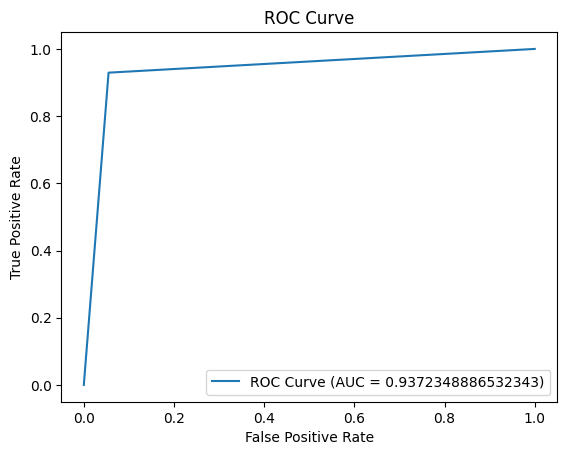

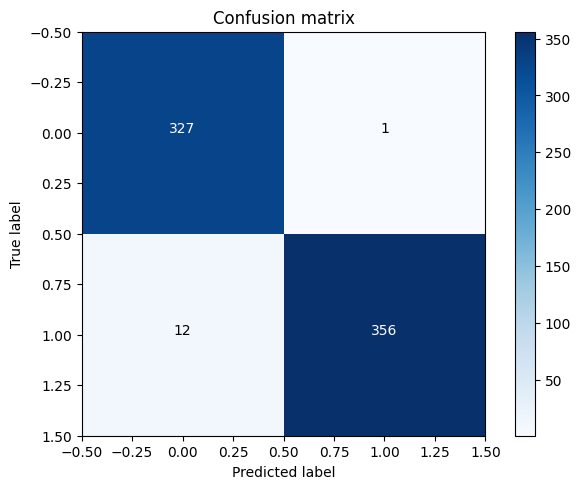

Confusion Matrix:
[[310  18]
 [ 26 342]]
Accuracy: 0.9367816091954023
Precision: 0.95
Recall: 0.9293478260869565
F1 Score: 0.9395604395604396


In [791]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train_encoded)

# Predict labels 
y_pred_gnb = gnb.predict(X_test_tfidf.toarray())

# Calculate Performance Metrics
accuracy_gnb = metrics.accuracy_score(y_test_encoded, y_pred_gnb)
precision_gnb = metrics.precision_score(y_test_encoded, y_pred_gnb)
recall_gnb = metrics.recall_score(y_test_encoded, y_pred_gnb)
f1_score_gnb = metrics.f1_score(y_test_encoded, y_pred_gnb)

# Calculate ROC curve and AUC
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(y_test_encoded, y_pred_gnb)
auc_gnb = metrics.roc_auc_score(y_test_encoded, y_pred_gnb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label=f'ROC Curve (AUC = {auc_gnb})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
conf_matrix_gnb = metrics.confusion_matrix(y_test_encoded, y_pred_gnb)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, title = 'Confusion matrix')

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix_gnb)

# Print performance metrics
print('Accuracy:', accuracy_gnb)
print('Precision:', precision_gnb)
print('Recall:', recall_gnb)
print('F1 Score:', f1_score_gnb)

# Grid Search of Parameters

### Question 8

In this part, you will attempt to find the best model for binary classification. 

- Construct a Pipleline that performs feature extraction, dimensionality reduction and classification;
- The evaluation of each combination is performed with 5-fold cross-validation (use the average validation set accuracy across folds).
- In addition to any other hyperparameters you choose, your gridsearch must at least include: Loading Data, Feature Extraction, Dimensionality Reduction, Classifier, and other options
- What are the 5 best combinations? Report their performances on the testing set.

In [792]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD 
from sklearn.svm import SVC

# Define Pipeline
pipeline = Pipeline([
    ('svd', TruncatedSVD()),  
    ('svc', SVC())  
])

# Define hyperparameters
parameters = {
    'svd__n_components': [2, 3, 4],  
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Grid Search Cross Validation
grid_search = GridSearchCV(pipeline, parameters, cv = 5)
grid_search.fit(X_train_tfidf, y_train_encoded)

# Print best combos
print("Best combinations:")
for i in range(5):
    print(f"Combination {i + 1}: {grid_search.cv_results_['params'][i]}")

# Print accuracy for best combo
best_estimator = grid_search.best_estimator_
test_accuracy = best_estimator.score(X_test_tfidf, y_test_encoded)
print(f"Test set accuracy for the best combination: {test_accuracy}")

Best combinations:
Combination 1: {'svc__C': 0.1, 'svc__kernel': 'linear', 'svd__n_components': 2}
Combination 2: {'svc__C': 0.1, 'svc__kernel': 'linear', 'svd__n_components': 3}
Combination 3: {'svc__C': 0.1, 'svc__kernel': 'linear', 'svd__n_components': 4}
Combination 4: {'svc__C': 0.1, 'svc__kernel': 'rbf', 'svd__n_components': 2}
Combination 5: {'svc__C': 0.1, 'svc__kernel': 'rbf', 'svd__n_components': 3}
Test set accuracy for the best combination: 0.9310344827586207


# Multiclass Classification

### Question 9

In this part, we aim to learn classifiers on the documents belonging to unqiue classes in the column leaf_label.

Perform Naive Bayes classification and multiclass SVM classification (with both One VS One and One VS the rest methods described above) and report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of your classifiers. How did you resolve the class imbalanace issue in the One VS the rest model?

In addition, answer the following questions:

- In the confusion matrix you should have an 10 × 10 matrix where 10 is the number of unique labels in the column leaf label. Please make sure that the order of these labels is as follows:

          map_row_to_class = {0:"basketball", 1:"baseball", 2:"tennis",

          ,→ 3:"football", 4:"soccer", 5:"forest fire", 6:"flood",

          ,→ 7:"earthquake", 8:"drought", 9:"heatwave"}

- Do you observe any structure in the confusion matrix? Are there distinct visible blocks on the major diagonal? What does this mean?
- Based on your observation from the previous part, suggest a subset of labels that should be merged into a new larger label and recompute the accuracy and plot the confusion matrix. How did the accuracy change in One VS One and One VS the rest?
- Does class imbalance impact the performance of the classification once some classes are merged? Provide a resolution for the class imbalance and recompute the accuracy and plot the confusion matrix in One VS One and One VS the rest?

In [837]:
# Read in data set
df = pd.read_csv('Project1-ClassificationDataset.csv')

# Split data, but with leaf_label included this time
train, test = train_test_split(df[["full_text","root_label","leaf_label"]], test_size = 0.2)

print('Number of data points in train data:', train.shape[0])
print('Number of data points in test data:', test.shape[0])

Number of data points in train data: 2780
Number of data points in test data: 696


In [838]:
train

,full_text,root_label,leaf_label
1368,"'On February 9th, 2025, the Super Bowl will be...",sports,football
2835,"'OMAHA, Neb. (WOWT) - Health experts at the Un...",climate,drought
2499,'A magnitude-4.8 earthquake was reported in No...,climate,earthquake
1046,'Serena Williams is getting candid about her m...,sports,tennis
1374,'Leonard Fournette #28 of the Tampa Bay Buccan...,sports,football
...,...,...,...
1999,"'Each December, we ask University Photographer...",climate,forest fire
276,'In an emotional post-game interview after the...,sports,basketball
125,"'Brendan Malone, a New York native whose lengt...",sports,basketball
2367,"'East Central Florida - Wednesday December 13,...",climate,flood


In [839]:
test

,full_text,root_label,leaf_label
403,'The tradition continues in Western New York! ...,sports,baseball
2946,'Here's how much rain has fallen in Kansas Cit...,climate,drought
2435,'This is a carousel. Use Next and Previous but...,climate,flood
263,'It was another big year for former UConn star...,sports,basketball
1081,'CBS Essentials is created independently of th...,sports,football
...,...,...,...
1901,"'IOWA CITY, Iowa — On a cold January afternoon...",climate,forest fire
1078,"'At the end of the regular season, Division I ...",sports,football
3005,"'Posted: Oct 16, 2023 7:45 PMUpdated: Oct 16, ...",climate,drought
1163,'Referee Halil Umut Meler was punched after th...,sports,football


In [840]:
from sklearn.preprocessing import LabelEncoder

# Mapping dictionary
class_to_label = {"basketball": 0, "baseball": 1, "tennis": 2, "football": 3,
                  "soccer": 4, "forest fire": 5, "flood": 6, "earthquake": 7,
                  "drought": 8, "heatwave": 9}
     
# LabelEncoder using mapping dictionary
label_encoder = LabelEncoder()
label_encoder.fit(list(class_to_label.keys()))  


# Encode class labels
train['encoded'] = label_encoder.fit_transform(train['leaf_label'])
test['encoded'] = label_encoder.transform(test['leaf_label'])

# Sort the data by the encoded value
train = train.sort_values(by = 'encoded')
test = test.sort_values(by = 'encoded')

In [841]:
import re

# Use function provided in assignment to clean data
def clean(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    texter = re.sub(r"[0-9]","", texter)
    texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter)
    texter = re.sub('\s+',' ', texter)
    texter = texter.lower()
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [842]:
# Clean train and test datasets
train['full_text'] = train['full_text'].apply(clean)
test['full_text'] = test['full_text'].apply(clean)

In [843]:
# Verify that training data was encoded correctly
train

,full_text,root_label,leaf_label,encoded
662,there is something very special about an indi...,sports,baseball,0
597,the bucknell softball team concludes its fall...,sports,baseball,0
402,on monday night newly retired tigers great mi...,sports,baseball,0
460,the turnover is great in the majors there wer...,sports,baseball,0
595,refugio tx it s a sad time for many in the re...,sports,baseball,0
...,...,...,...,...
974,whp global a leading brand management company...,sports,tennis,9
922,coco gauff is enjoying her well earned downti...,sports,tennis,9
834,peyton hansen had never fired the rifle befor...,sports,tennis,9
746,springfield mo edited news release ky as pick...,sports,tennis,9


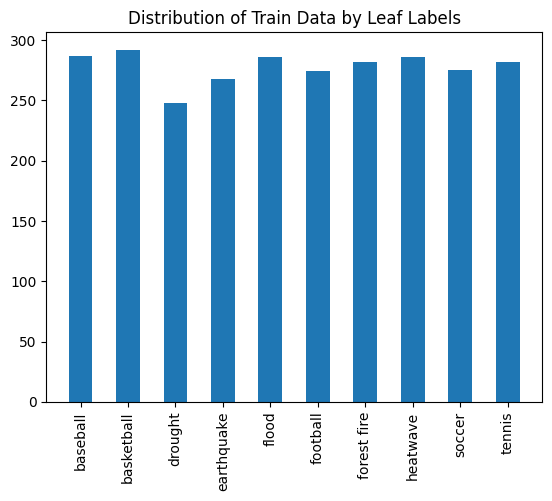

In [844]:
counter = Counter(train['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot histogram
indexes = np.arange(len(leaf_names))
plt.bar(indexes, leaf_counts, 0.5)
plt.xticks(indexes, leaf_names, rotation = 90)
plt.title('Distribution of Train Data by Leaf Labels')
plt.show()

In [845]:
print(leaf_counts)

dict_values([287, 292, 248, 268, 286, 274, 282, 286, 275, 282])


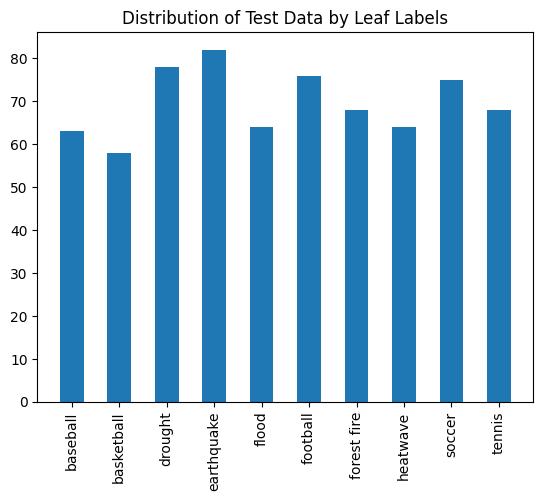

In [846]:
counter = Counter(test['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot histogram 
indexes = np.arange(len(leaf_names))
plt.bar(indexes, leaf_counts, 0.5)
plt.xticks(indexes, leaf_names, rotation = 90)
plt.title('Distribution of Test Data by Leaf Labels')
plt.show()

In [847]:
print(leaf_counts)

dict_values([63, 58, 78, 82, 64, 76, 68, 64, 75, 68])


In [848]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
import re

# WordNetLemmatizer
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

# Functions from Project 1 Helper Code
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def rmv_nums(doc):
    # Text input is string, returns array of lowercased strings(words).
    return (word for word in lemmatize_sent(analyzer(doc)) 
            if not word.isdigit())

# CountVectorizer 
vectorizer = CountVectorizer(analyzer = rmv_nums, min_df = 3, stop_words = 'english')

# Fit and transform the training data
X_train_counts = vectorizer.fit_transform(train['full_text'])

# Transform testing data
X_test_counts = vectorizer.transform(test['full_text'])

# TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform training data using TfidfTransformer
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform testing data using fitted TfidfTransformer
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Print Results
print("Shape of TF-IDF-processed train matrix:", X_train_tfidf.shape)
print("Shape of TF-IDF-processed test matrix:", X_test_tfidf.shape)

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Shape of TF-IDF-processed train matrix: (2780, 13584)
Shape of TF-IDF-processed test matrix: (696, 13584)


In [849]:
y_train_encoded = train['encoded']
y_test_encoded = test['encoded']

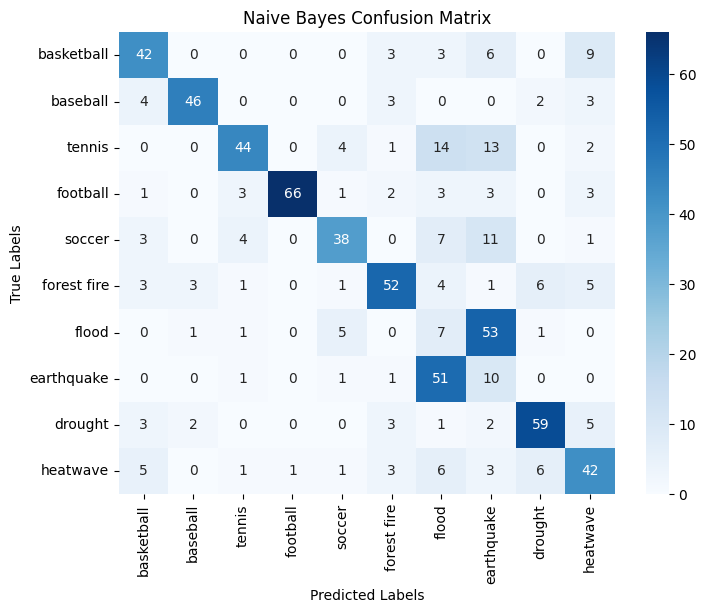

Naive Bayes Metrics:
Accuracy: 0.5833333333333334
Precision: 0.6544467282962426
Recall: 0.5833333333333334
F1 Score: 0.6134013909620676


In [853]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf.toarray(), y_train_encoded)

# Predict labels
nb_predictions = nb_classifier.predict(X_test_tfidf.toarray())

# Performance Metrics
nb_accuracy = accuracy_score(y_test_encoded, nb_predictions)
nb_precision = precision_score(y_test_encoded, nb_predictions, average='weighted')
nb_recall = recall_score(y_test_encoded, nb_predictions, average='weighted')
nb_f1_score = f1_score(y_test_encoded, nb_predictions, average='weighted')


# Confusion matrix
nb_conf_matrix = confusion_matrix(y_test_encoded, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap = 'Blues',
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)

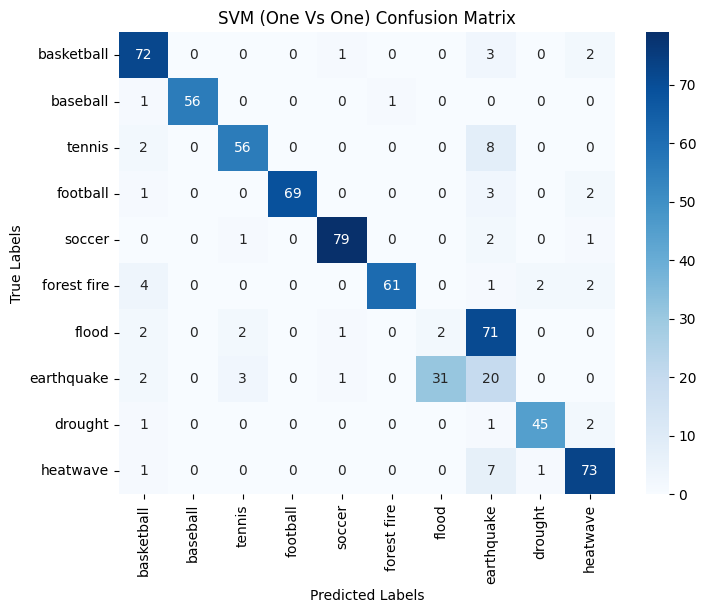

SVM (One Vs One) Metrics:
Accuracy: 0.7658045977011494
Precision: 0.7762097271802484
Recall: 0.7658045977011494
F1 Score: 0.7668461748307274


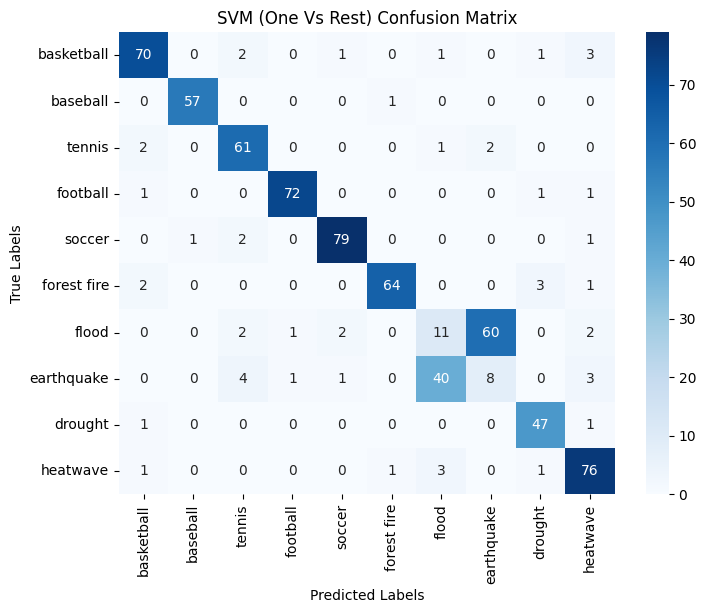

SVM (One Vs Rest) Metrics:
Accuracy: 0.7830459770114943
Precision: 0.776683625582672
Recall: 0.7830459770114943
F1 Score: 0.7788110521034909


In [807]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class Labels
class_labels = ["basketball", "baseball", "tennis", "football", "soccer",
                "forest fire", "flood", "earthquake", "drought", "heatwave"]

# Train SVM classifier (One Vs One)
svm_one_vs_one = OneVsOneClassifier(SVC(kernel = 'linear'))
svm_one_vs_one.fit(X_train_tfidf, y_train_encoded)

# Predict labels
svm_one_vs_one_predictions = svm_one_vs_one.predict(X_test_tfidf)

# Compute evaluation metrics
svm_one_vs_one_accuracy = accuracy_score(y_test_encoded, svm_one_vs_one_predictions)
svm_one_vs_one_precision = precision_score(y_test_encoded, svm_one_vs_one_predictions, average = 'weighted')
svm_one_vs_one_recall = recall_score(y_test_encoded, svm_one_vs_one_predictions, average = 'weighted')
svm_one_vs_one_f1 = f1_score(y_test_encoded, svm_one_vs_one_predictions, average = 'weighted')

# Compute confusion matrix
svm_one_vs_one_conf_matrix = confusion_matrix(y_test_encoded, svm_one_vs_one_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_one_vs_one_conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One Vs One) Confusion Matrix')
plt.show()

print("SVM (One Vs One) Metrics:")
print("Accuracy:", svm_one_vs_one_accuracy)
print("Precision:", svm_one_vs_one_precision)
print("Recall:", svm_one_vs_one_recall)
print("F1 Score:", svm_one_vs_one_f1)

# Train SVM classifier (One Vs Rest)
svm_one_vs_rest = OneVsRestClassifier(SVC(kernel = 'linear'))
svm_one_vs_rest.fit(X_train_tfidf, y_train_encoded)

# Predict labels
svm_one_vs_rest_predictions = svm_one_vs_rest.predict(X_test_tfidf)

# Performance Metrics
svm_one_vs_rest_accuracy = accuracy_score(y_test_encoded, svm_one_vs_rest_predictions)
svm_one_vs_rest_precision = precision_score(y_test_encoded, svm_one_vs_rest_predictions, average = 'weighted')
svm_one_vs_rest_recall = recall_score(y_test_encoded, svm_one_vs_rest_predictions, average = 'weighted')
svm_one_vs_rest_f1 = f1_score(y_test_encoded, svm_one_vs_rest_predictions, average = 'weighted')

# Compute confusion matrix
svm_one_vs_rest_conf_matrix = confusion_matrix(y_test_encoded, svm_one_vs_rest_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_one_vs_rest_conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One Vs Rest) Confusion Matrix')
plt.show()

print("SVM (One Vs Rest) Metrics:")
print("Accuracy:", svm_one_vs_rest_accuracy)
print("Precision:", svm_one_vs_rest_precision)
print("Recall:", svm_one_vs_rest_recall)
print("F1 Score:", svm_one_vs_rest_f1)


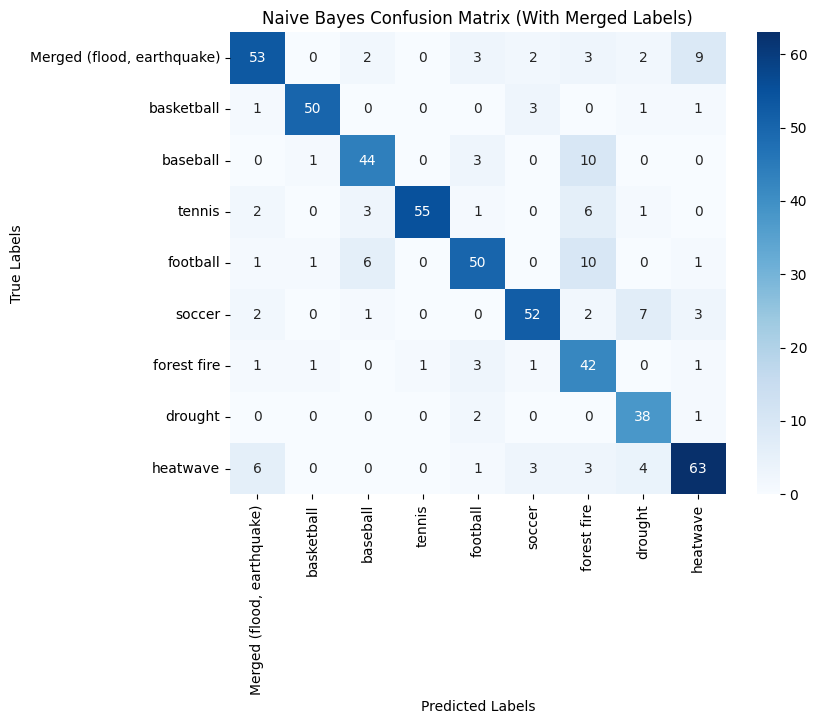

Accuracy: 0.603448275862069


In [808]:
# Merge labels
merged_labels = ['flood', 'earthquake']

# Update label encoding
merged_label_idx = len(class_labels)  
y_train_encoded_merged = y_train_encoded.copy()
y_test_encoded_merged = y_test_encoded.copy()
for label in merged_labels:
    y_train_encoded_merged[y_train_encoded == label] = merged_label_idx
    y_test_encoded_merged[y_test_encoded == label] = merged_label_idx

# Train Naive Bayes 
nb_classifier_merged = GaussianNB()
nb_classifier_merged.fit(X_train_tfidf.toarray(), y_train_encoded_merged)

# Predict labels
nb_predictions_merged = nb_classifier_merged.predict(X_test_tfidf.toarray())

# Calculate Accuracy
nb_accuracy_merged = accuracy_score(y_test_encoded_merged, nb_predictions_merged)

# Calculate confusion matrix
nb_conf_matrix_merged = confusion_matrix(y_test_encoded_merged, nb_predictions_merged)

# Remove "flood" and "earthquake" 
nb_conf_matrix_merged = np.delete(nb_conf_matrix_merged, class_labels.index('flood'), axis = 0)
nb_conf_matrix_merged = np.delete(nb_conf_matrix_merged, class_labels.index('earthquake'), axis=1)

# Plot confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix_merged, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels],
            yticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix (With Merged Labels)')
plt.show()

print("Accuracy:", nb_accuracy_merged)

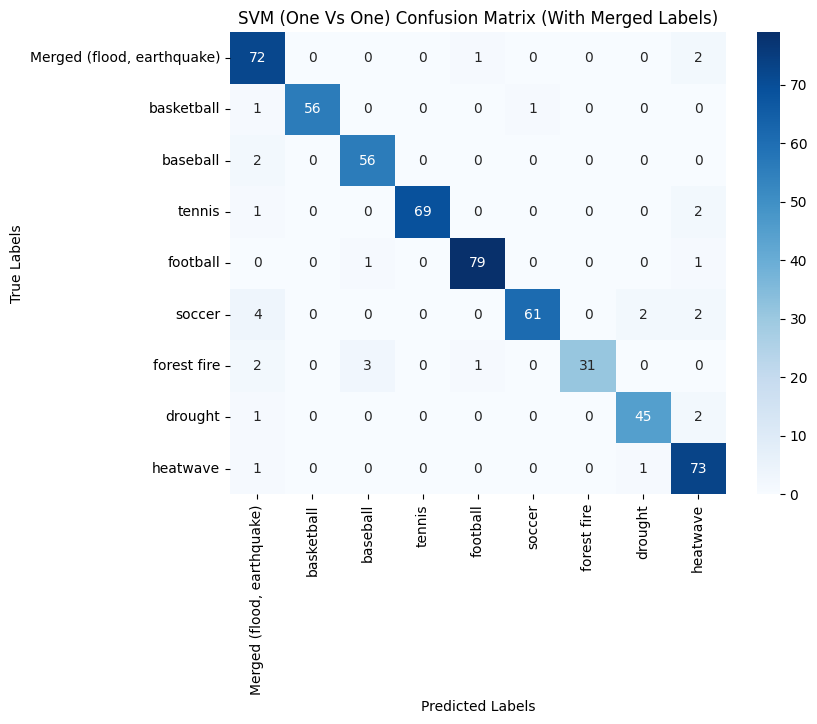

Accuracy: 0.7658045977011494


In [809]:
# Merge labels
merged_labels = ['flood', 'earthquake']

# Update label encoding
merged_label_idx_svm = len(class_labels)  
y_train_encoded_merged_svm = y_train_encoded.copy()
y_test_encoded_merged_svm = y_test_encoded.copy()
for label in merged_labels:
    y_train_encoded_merged_svm[y_train_encoded == label] = merged_label_idx_svm
    y_test_encoded_merged_svm[y_test_encoded == label] = merged_label_idx_svm

# Train SVM classifier (One Vs One) 
svm_one_vs_one_merged = OneVsOneClassifier(SVC(kernel='linear'))
svm_one_vs_one_merged.fit(X_train_tfidf, y_train_encoded_merged_svm)

# Predict labels
svm_one_vs_one_predictions_merged = svm_one_vs_one_merged.predict(X_test_tfidf)

# Calculate Accuracy
svm_one_vs_one_accuracy_merged = accuracy_score(y_test_encoded_merged_svm, svm_one_vs_one_predictions_merged)

# Calculate confusion matrix 
svm_one_vs_one_conf_matrix_merged = confusion_matrix(y_test_encoded_merged_svm, svm_one_vs_one_predictions_merged)

# Remove "flood" and "earthquake" 
svm_one_vs_one_conf_matrix_merged = np.delete(svm_one_vs_one_conf_matrix_merged, 
                                              class_labels.index('flood'), axis = 0)
svm_one_vs_one_conf_matrix_merged = np.delete(svm_one_vs_one_conf_matrix_merged, 
                                              class_labels.index('earthquake'), axis = 1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_one_vs_one_conf_matrix_merged, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels], 
            yticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One Vs One) Confusion Matrix (With Merged Labels)')
plt.show()

print("Accuracy:", svm_one_vs_one_accuracy_merged)

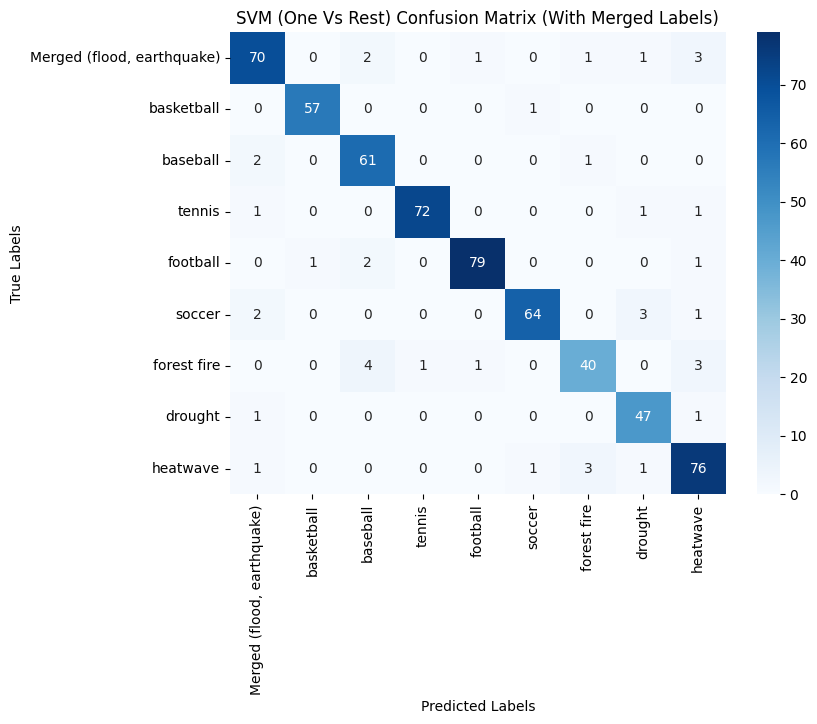

Accuracy: 0.7830459770114943


In [810]:
# Merge labels
merged_labels = ['flood', 'earthquake']

# Update label encoding
merged_label_idx_svm_ovr = len(class_labels)  
y_train_encoded_merged_svm_ovr = y_train_encoded.copy()
y_test_encoded_merged_svm_ovr = y_test_encoded.copy()
for label in merged_labels:
    y_train_encoded_merged_svm_ovr[y_train_encoded == label] = merged_label_idx_svm_ovr
    y_test_encoded_merged_svm_ovr[y_test_encoded == label] = merged_label_idx_svm_ovr

# Train SVM classifier (One Vs Rest) 
svm_one_vs_rest_merged = OneVsRestClassifier(SVC(kernel='linear'))
svm_one_vs_rest_merged.fit(X_train_tfidf, y_train_encoded_merged_svm_ovr)

# Predict labels
svm_one_vs_rest_predictions_merged = svm_one_vs_rest_merged.predict(X_test_tfidf)

# Calculate Accuracy
svm_one_vs_rest_accuracy_merged = accuracy_score(y_test_encoded_merged_svm_ovr, svm_one_vs_rest_predictions_merged)

# Compute confusion matrix
svm_one_vs_rest_conf_matrix_merged = confusion_matrix(y_test_encoded_merged_svm_ovr, svm_one_vs_rest_predictions_merged)

# Remove "flood" and "earthquake" 
svm_one_vs_rest_conf_matrix_merged = np.delete(svm_one_vs_rest_conf_matrix_merged, 
                                               class_labels.index('flood'), axis = 0)
svm_one_vs_rest_conf_matrix_merged = np.delete(svm_one_vs_rest_conf_matrix_merged, 
                                               class_labels.index('earthquake'), axis = 1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_one_vs_rest_conf_matrix_merged, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels],
            yticklabels=[merged_label] + [label for label in class_labels if label not in merged_labels])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One Vs Rest) Confusion Matrix (With Merged Labels)')
plt.show()

print("Accuracy:", svm_one_vs_rest_accuracy_merged)

In [811]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Convert sparse TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Resolve class imbalance
class_weights = compute_class_weight('balanced', classes = np.unique(y_train_encoded), y = y_train_encoded)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_dense, y_train_encoded)

# One VS One method
svm_ovo_classifier = OneVsOneClassifier(SVC(kernel = 'linear'))
svm_ovo_classifier.fit(X_train_dense, y_train_encoded)

# One VS Rest method
svm_ovr_classifier = OneVsRestClassifier(SVC(kernel = 'linear', class_weight = 'balanced'))
svm_ovr_classifier.fit(X_train_dense, y_train_encoded)

# Predictions
nb_predictions = nb_classifier.predict(X_test_dense)
svm_ovo_predictions = svm_ovo_classifier.predict(X_test_dense)
svm_ovr_predictions = svm_ovr_classifier.predict(X_test_dense)

# Confusion matrices
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_predictions)
svm_ovo_confusion_matrix = confusion_matrix(y_test_encoded, svm_ovo_predictions)
svm_ovr_confusion_matrix = confusion_matrix(y_test_encoded, svm_ovr_predictions)

# Accuracy scores
nb_accuracy = accuracy_score(y_test_encoded, nb_predictions)
svm_ovo_accuracy = accuracy_score(y_test_encoded, svm_ovo_predictions)
svm_ovr_accuracy = accuracy_score(y_test_encoded, svm_ovr_predictions)

# Classification reports
nb_report = classification_report(y_test_encoded, nb_predictions)
svm_ovo_report = classification_report(y_test_encoded, svm_ovo_predictions)
svm_ovr_report = classification_report(y_test_encoded, svm_ovr_predictions)

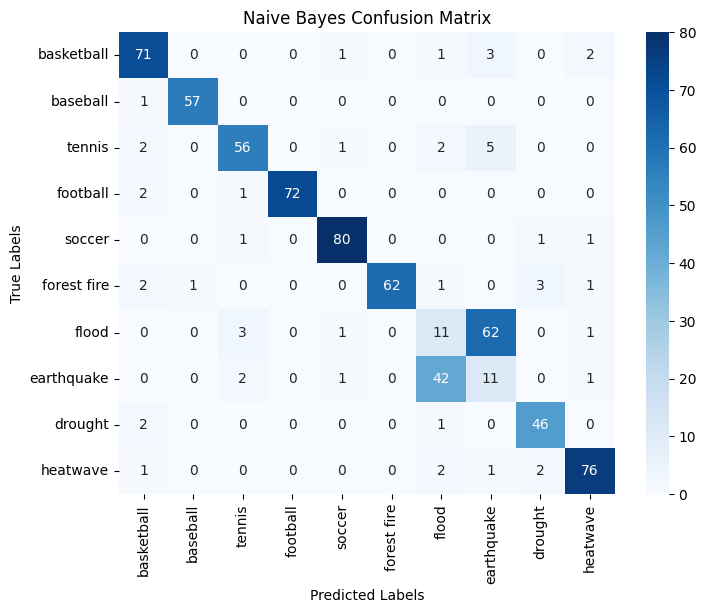

Naive Bayes Accuracy: 0.603448275862069
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        78
           1       0.93      0.86      0.89        58
           2       0.79      0.67      0.72        66
           3       0.98      0.73      0.84        75
           4       0.75      0.60      0.67        83
           5       0.81      0.74      0.78        70
           6       0.10      0.10      0.10        78
           7       0.06      0.12      0.08        57
           8       0.70      0.78      0.74        49
           9       0.79      0.77      0.78        82

    accuracy                           0.60       696
   macro avg       0.67      0.61      0.63       696
weighted avg       0.67      0.60      0.63       696



In [812]:
# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(svm_ovr_confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(nb_report)

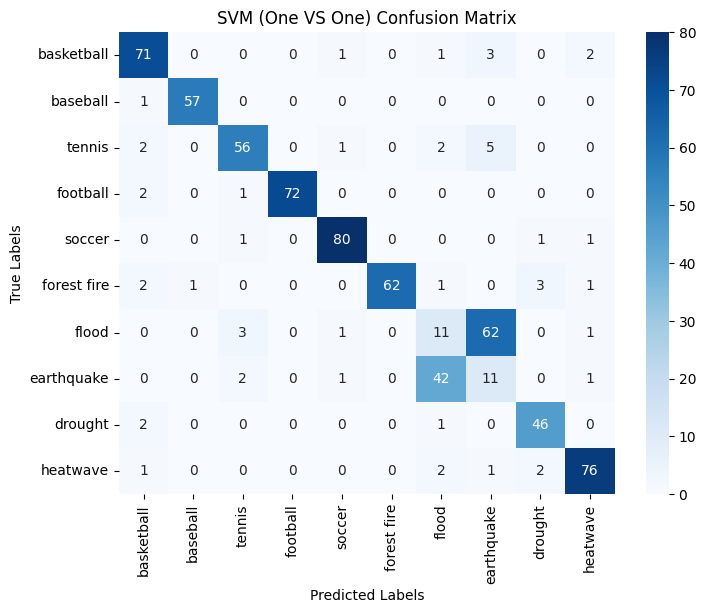

SVM (One VS One) Accuracy: 0.7658045977011494
SVM (One VS One) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        78
           1       1.00      0.97      0.98        58
           2       0.90      0.85      0.88        66
           3       1.00      0.92      0.96        75
           4       0.96      0.95      0.96        83
           5       0.98      0.87      0.92        70
           6       0.06      0.03      0.04        78
           7       0.17      0.35      0.23        57
           8       0.94      0.92      0.93        49
           9       0.89      0.89      0.89        82

    accuracy                           0.77       696
   macro avg       0.77      0.77      0.77       696
weighted avg       0.78      0.77      0.77       696



In [813]:
# Plot confusion matrix for SVM (One VS One)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_ovr_confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One VS One) Confusion Matrix')
plt.show()

print("SVM (One VS One) Accuracy:", svm_ovo_accuracy)
print("SVM (One VS One) Classification Report:")
print(svm_ovo_report)

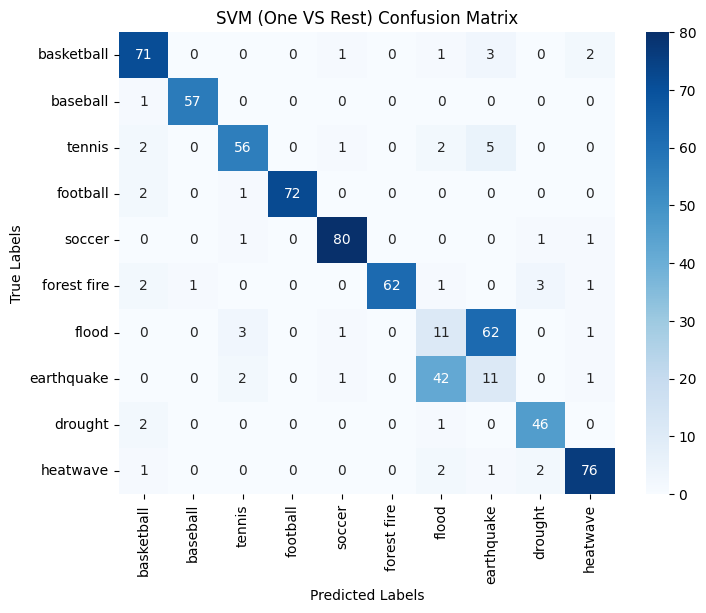

SVM (One VS Rest) Accuracy: 0.7787356321839081
SVM (One VS Rest) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        78
           1       0.98      0.98      0.98        58
           2       0.89      0.85      0.87        66
           3       1.00      0.96      0.98        75
           4       0.95      0.96      0.96        83
           5       1.00      0.89      0.94        70
           6       0.18      0.14      0.16        78
           7       0.13      0.19      0.16        57
           8       0.88      0.94      0.91        49
           9       0.93      0.93      0.93        82

    accuracy                           0.78       696
   macro avg       0.78      0.78      0.78       696
weighted avg       0.79      0.78      0.78       696



In [814]:
# Plot confusion matrix for SVM (One VS Rest)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_ovr_confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM (One VS Rest) Confusion Matrix')
plt.show()

print("SVM (One VS Rest) Accuracy:", svm_ovr_accuracy)
print("SVM (One VS Rest) Classification Report:")
print(svm_ovr_report)

# Word Embedding

### Question 10

Read the paper about GLoVE embeddings - found here (https://nlp.stanford.edu/pubs/glove.pdf) and answer the following subquestions:

- Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?
- In the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?
- What do you expect for the values of,
  
  ||GLoVE["woman"] - GLoVE["man"]||2, ||GLoVE["wife"] - GLoVE["husband"]||2 and
  ||GLoVE["wife"] - GLoVE["orange"]||2 ? Compare these values.
  
- Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE
embedding?

In [815]:
print(np.linalg.norm(embeddings_dict['woman']-embeddings_dict['man']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['orange']))

4.7539396
3.1520462
8.667715


### Question 11

For the binary classification task distinguishing the “sports” class and “climate” class:

Describe a feature engineering process that uses GLoVE word embeddings to represent each document. You have to abide by the following rules:

- A representation of a text segment needs to have a vector dimension that CANNOT exceed the dimension of the GLoVE embedding used per word of the segment.
- You cannot use TF-IDF scores (or any measure that requires looking at the complete dataset) as a pre-processing routine.
- Important: In this section, feel free to use raw features from any column in the original data file not just full text. The column keywords might be useful... or not. Make sure that your result achieves an accuracy of at least 92%.
- To aggregate these words into a single vector consider normalization the vectors, averaging across the vectors.

Select a classifier model, train and evaluate it with your GLoVE-based feature. If you are doing any cross-validation, please make sure to use a limited set of options so that your code finishes running in a reasonable amount of time.

In [816]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap.umap_ as umap

def load_glove_embeddings(embedding_file):
    embeddings_dict = {}
    with open(embedding_file, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

def preprocess_text(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"&quot;", "\"", text)
    text = re.sub('&#39;', "\"", text)
    text = re.sub('\n', " ", text)
    text = re.sub(' u '," you ", text)
    text = re.sub('`',"", text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r"(!)\1+", r"!", text)
    text = re.sub(r"(\?)\1+", r"?", text)
    text = re.sub('&amp;', 'and', text)
    text = re.sub('\r', ' ', text)
    text = re.sub(r"[0-9]", "", text)
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.lower()
    clean = re.compile('<.*?>')
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = re.sub(clean, '', text)
    if text == "":
        text = ""
    return text

def average_pooling(text, embeddings_dict, dimension_of_glove):
    words = text.split()
    text_embeddings = []
    for word in words:
        if word in embeddings_dict:
            text_embeddings.append(embeddings_dict[word])
    if len(text_embeddings) == 0:
        return np.zeros(dimension_of_glove)
    avg_embedding = np.mean(text_embeddings, axis = 0)
    return avg_embedding

def feature_engineering(texts, embeddings_dict, dimension_of_glove):
    X = np.array([average_pooling(text, embeddings_dict, dimension_of_glove) for text in texts])
    return X

def train_and_evaluate(X_train, X_test, y_train, y_test):
    classifier = LogisticRegression(max_iter = 1000)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Load dataset
data = pd.read_csv('Project1-ClassificationDataset.csv')

# Load GLoVE embeddings
glove_file = "glove.6B.300d.txt"
dimension_of_glove = int(glove_file.split(".")[-2][:-1])
embeddings_dict = load_glove_embeddings(glove_file)

# Prepare data
X = feature_engineering(data['full_text'], embeddings_dict, dimension_of_glove)
y = data['root_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train and evaluate the model
accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9367816091954023


### Question 12

Plot the relationship between the dimension of the pre-trained GLoVE embedding and the resulting accuracy of the model in the classification task. Describe the observed trend. Is this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the link.

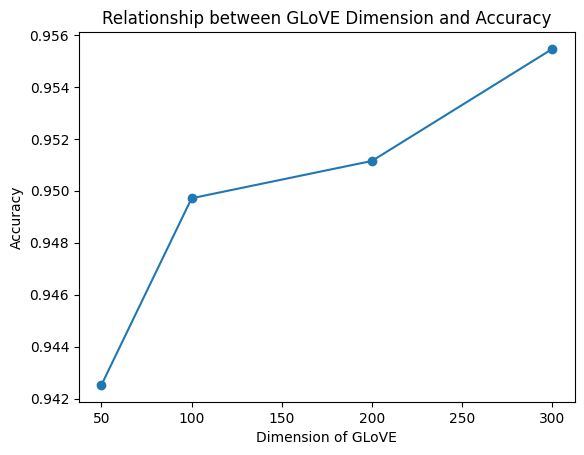

In [817]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import re

# Load data
data = pd.read_csv('Project1-ClassificationDataset.csv')

def preprocess_text(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"&quot;", "\"", text)
    text = re.sub('&#39;', "\"", text)
    text = re.sub('\n', " ", text)
    text = re.sub(' u '," you ", text)
    text = re.sub('`',"", text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r"(!)\1+", r"!", text)
    text = re.sub(r"(\?)\1+", r"?", text)
    text = re.sub('&amp;', 'and', text)
    text = re.sub('\r', ' ', text)
    text = re.sub(r"[0-9]", "", text)
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.lower()
    clean = re.compile('<.*?>')
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = re.sub(clean, '', text)
    if text == "":
        text = ""
    return text

def average_pooling(text, embeddings_dict, dimension_of_glove):
    words = text.split()
    text_embeddings = []
    for word in words:
        if word in embeddings_dict:
            text_embeddings.append(embeddings_dict[word])
    if len(text_embeddings) == 0:
        return np.zeros(dimension_of_glove)
    avg_embedding = np.mean(text_embeddings, axis=0)
    return avg_embedding

def feature_engineering(texts, embeddings_dict, dimension_of_glove):
    X = np.array([average_pooling(preprocess_text(text), 
                                  embeddings_dict, dimension_of_glove) for text in texts])
    return X

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy


accuracies = []

# Loop through GLoVE files 
glove_files = ["glove.6B.50d.txt", "glove.6B.100d.txt", "glove.6B.200d.txt", "glove.6B.300d.txt"]
for glove_file in glove_files:
    dimension_of_glove = int(glove_file.split(".")[-2][:-1])
    embeddings_dict = load_glove_embeddings(glove_file)
    X = feature_engineering(data['full_text'], embeddings_dict, dimension_of_glove)
    accuracy = train_and_evaluate(X, y)
    accuracies.append((dimension_of_glove, accuracy))

# Convert accuracies to DataFrame
accuracies_df = pd.DataFrame(accuracies, columns=['Dimension of GLoVE', 'Accuracy'])

# Plot GLoVE embeddings and accuracy
plt.plot(accuracies_df['Dimension of GLoVE'], accuracies_df['Accuracy'], marker = 'o')
plt.title('Relationship between GLoVE Dimension and Accuracy')
plt.xlabel('Dimension of GLoVE')
plt.ylabel('Accuracy')
plt.show()


### Question 13

Compare and contrast the two visualizations. Are there clusters formed in either or both of the plots? We will pursue the clustering aspect further in the next project.

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


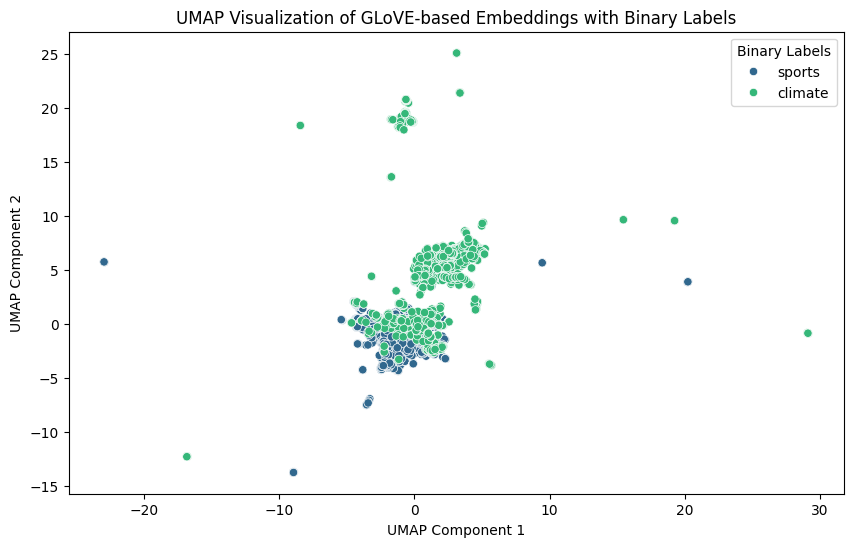

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


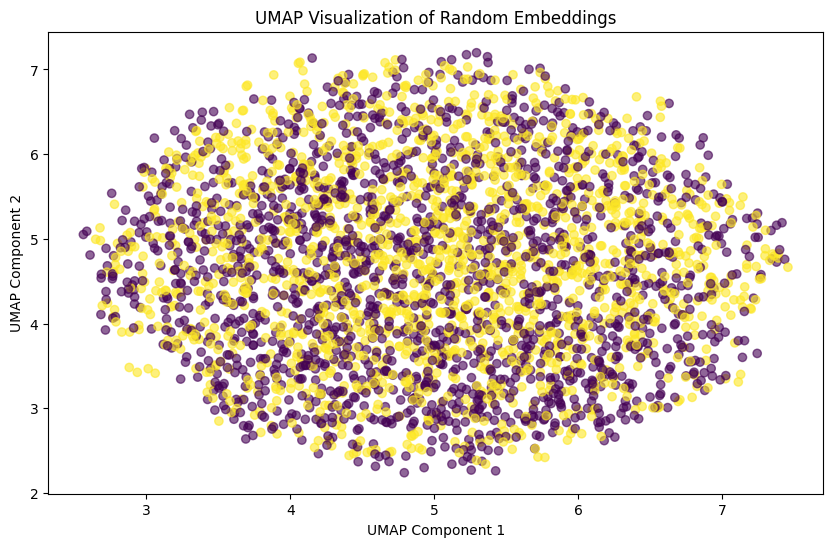

In [818]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Project1-ClassificationDataset.csv')

# feature engineering with GLoVE embeddings
def feature_engineering(texts, embeddings_dict, dimension_of_glove):
    X = []
    for text in texts:
        words = text.split()
        embeddings = [embeddings_dict[word] for word in words if word in embeddings_dict]
        if embeddings:
            averaged_embedding = np.mean(embeddings, axis=0)
            X.append(averaged_embedding)
        else:
            X.append(np.zeros(dimension_of_glove))  
    return np.array(X)

# Load GLoVE embeddings
glove_file = "glove.6B.300d.txt"
embeddings_dict = {}
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector

# Feature engineering 
dimension_of_glove = 300
X_glove = feature_engineering(data['full_text'], embeddings_dict, dimension_of_glove)

# Normalize
scaler = StandardScaler()
X_glove_normalized = scaler.fit_transform(X_glove)

# Apply UMAP 
umap_embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(X_glove_normalized)

# Plot GLoVE embeddings 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], 
                hue=data['root_label'], palette='viridis')
plt.title('UMAP Visualization of GLoVE-based Embeddings with Binary Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Binary Labels')
plt.show()

# Random Vectors
X_random, y_random = make_classification(n_samples=len(data), 
                                         n_features=dimension_of_glove, random_state=42)

# Normalize
X_random_normalized = scaler.fit_transform(X_random)

# Apply UMAP 
umap_embedding_random = umap.UMAP(n_components=2, random_state=42).fit_transform(X_random_normalized)

# Plot random embeddings
plt.figure(figsize=(10, 6))
plt.scatter(umap_embedding_random[:, 0], umap_embedding_random[:, 1], 
            c = y_random, cmap = 'viridis', alpha = 0.6)
plt.title('UMAP Visualization of Random Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()
